# SOC Baseline LEAFs
This notebook documents the generation of currently available SOC LEAFs for SBTN Land v2 Land Quality Target. Full documentaion of the SOC model can be found on [SOC_Documentation](../documentation/SOC_Documentation.md) and an example of how to generate new crop SOC LEAFs on [SOC_LEAF_Example](../examples/SOC_LEAF_Example.ipynb).

Here, LEAFs are generated for 1) annual crops, 2) permanent crops, and 3) forest & grassland land uses. As model generate annual outputs, only the end year is preserved, in this case 2030.

## Step 1 - Data Gathering and Preparation
As explained in SOC Documentation, several data layers need to be gathered.

### 1.1 - Soil & Weather
Precipitation and air temperature data have been downloaded and processed. It be found under [data/](../data/). SoilGrids data have been downloaded and processed into UHTH zones in the needed format and is also available in the same folder. 

**🚧 TODO: Update reference 🚧**
This data is too large to be be hosted in a github repository. Instructions into how to download it can be found on XXX

### 1.2 - Commodity Data
#### 1.2.1 - Land use
Land use layers have been adapted from Morais, Teixeria & Domingos (2019) and can be found under [data/land_use/](../data/land_use/). These layers include annual & permanent crops, forestry, and grasslands.

#### 1.2.2 - Annual & Permanent Crops
##### 1.2.2.1 - Yields
Commodity yield input data from FAO has already been summarized and can be found at [data/crops/fao_crop_yields_1423.csv](data/crops/fao_crop_yields_1423.csv) file. The needed SPAM data has been downloaded into [data/crops/spam2020V2r0_global_yield](data/crops/spam2020V2r0_global_yield) folder.

##### 1.2.2.2 -Other data
All other needed data based on yields, land use, and soil & weather, including potential crop evapotranspiration, pre-calculated PET-location based layer, $\textstyle K_c$ values, stage durations, as well as other supporting data has been uploaded into [data/crops](../data/crops/) folder.



#### 1.2.3 - Forests
LEAFs are developed for Broadleaf Deciduous (BRDC) and Needleleaf Evergreen (NEEV) forests for different climate zones, including:
    1. Boreal, dry
    2. Boreal, moist
    3. Cold temperate, dry
    4. Cold temperate, moist,
    5. Subtropical,
    6. Tropical,
    7. Warm temperate, dry, and
    8. Warm temperate, moist

Note that not all combinations exist, and thus not all are provided.

Plant cover is assumed constant through the year.
##### 1.2.3.1 - Litter
Main source of carbon inputs through residues is the litter generated in forests. To estimate this, liter rates were obtained from table 3.2.1 of [IPCC 2003](https://www.ipcc-nggip.iges.or.jp/public/gpglulucf/gpglulucf_files/Chp3/Chp3_2_Forest_Land.pdf), and have been summarized in [forest_residues_IPCC](../data/forest/forest_residues_IPCC.xlsx) excel spreadsheet.

To estimate litter rates, forest age need to be estimated. This were obtained from  the [Global Forest Age Dataset (GFAD)](https://research.wur.nl/en/datasets/the-global-forest-age-dataset-and-its-uncertainties-gfadv11) v1.1 is used. This dataset assigns the fraction of each grid cell to an age band (1-10, 11-20, ... 141-150) for 4 different forest types: Broadleaf Deciduous, Broadleaf Evergreen, Needleleaf Deciduous, and Needleleaf Evergreen.

It should be noted that the age dataset estimates forest age for 2010. As SOC baseline is for 2016, it has been assumed that no disturbances have occurred between 2010 and 2016. Also, no management practices have been implemented thus far, and should be incorporated in the future for better representation of forest plantations.

##### 1.2.3.2 -Other data
All other needed data based on yields, land use, and soil & weather has already been processed for crops. No further water requirements calculations beside precipitation is needed.

Full description implementation of methods for Forests can be found on [SOC_LEAFs_Forest_Support](../documentation/SOC_Support/SOC_LEAFs_Forest_Support.ipynb) notebook.

#### 1.2.4 - Grassland
For the moment, only natural grasslands have been generated. Managed grasslands are a natural next steps and support in their development is welcome.

Plant cover is assumed constant through the year.

##### 1.2.4.1 - Plant Residues
Resides, both above- and below-ground biomass were obtained from Table 6.4 of the [2006 IPCC - Grasslands](https://www.ipcc-nggip.iges.or.jp/public/2006gl/pdf/4_Volume4/V4_06_Ch6_Grassland.pdf) methodology report for the different thermal zones, which were then converted into FAO climate zones. Data can be found on [grassland_residues_IPCC](../data/grasslands/grassland_residues_IPCC.xlsx) excel spreadsheet.

Annual plant residues are then distributed evenly through each month. 
##### 1.2.4.2 - Animals Manure or Dung
Animal manure is another source of carbon in grasslands. For this, an average amount of animals per hectares, including cattle, sheep and goat was determined per uhth pixel using FAO's [Gridded livestock density v4](https://data.apps.fao.org/catalog/dataset/9d1e149b-d63f-4213-978b-317a8eb42d02). Total amount of carbon from animal deposition was then calculated by using  [IPCC 2019](https://www.ipcc-nggip.iges.or.jp/public/2019rf/pdf/4_Volume4/19R_V4_Ch10_Livestock.pdf) annual nitrogen depositions per head per continent and [FAO's Farmer’s Compost Handbook—Experiences in Latin America](https://openknowledge.fao.org/server/api/core/bitstreams/0658b4e0-53e3-4ed7-89d0-ff351bec1dff/content) C:N ratios.

IPCC 2019 information was then mapped into each uhth pixel. Some continents offer 3 productivity systems for cattle: high, average, and low, which should be run separately. 
Annual animal residues are then distributed evenly through each month. 

##### 1.2.4.3 -Other data
All other needed data based on land use, and soil & weather has already been processed for crops. 

Irrigation requirements could be calculated with $\textstyle K_c$ curves with data been provided under [K_Crop_Data.csv](../data/crops/K_Crop_Data.csv). For grasses with multiple harvest a year, new functions should be build or adapted from current ones.


Full implementation of methods and data input needed to run RothC for grasslands can be found on [SOC_LEAFs_Grasslands_Support](../documentation/SOC_Support/SOC_LEAFs_Grasslands_Support.ipynb) notebook. 

## 2. Run RothC
SOC LEAFs have been calculated for 2030, and are available as individual rasters, and csv and geopackages for ecoregion, subcountry and country averages.

### 2.1. SOC LEAFs per commodity land use rasters
A unique function for crops (annual and permanent), forests, and grassland has been developed. CSVs with inputs have been generated for each type of commodity

In [1]:
# Loading modules
import sbtn_leaf.RothC_Raster as rothC
from sbtn_leaf.paths import data_path, LEAFs_dir
import sbtn_leaf.map_plotting as mp

import importlib
import polars as pl


Could not determine dtype for column 1, falling back to string


#### 2.1.1. Annual Crops

#### 2.1.2. Permanent Crops

#### 2.1.3. Forests
All different forest and climate types, as well as the additional input required to run RothC model, have been included in [forest_baseline_rothc_scenarios](../data/forest/forest_baseline_rothc_scenarios.xlsx).


#### 2.1.4. Grasslands
6 different scenarios have been generated for different combinations of animals present:
    1. Only cattle - average,
    2. Only cattle - high productivity,
    3. Only cattle - low productivity,
    4. Only sheep,
    5. Only goat,
    6. all animals - average productivity.

A csv with all different inputs can be found in [grassland_baseline_rothc_scenarios.csv](../data/grasslands/grassland_baseline_rothc_scenarios.csv). All inputs has been already created.

In [70]:
importlib.reload(rothC)

<module 'sbtn_leaf.RothC_Raster' from 'C:\\Users\\loyola\\OneDrive - World Wildlife Fund, Inc\\Documents\\203. Python projects\\SBTN_Test\\src\\sbtn_leaf\\RothC_Raster.py'>

In [2]:
# scenario filepaths
grassland_rothc_scenario_fp = data_path("grasslands", "grassland_baseline_rothc_scenarios.xlsx")

In [3]:
# Running scenarios. This takes time!
rothC.run_rothc_grassland_scenarios_from_excel(grassland_rothc_scenario_fp, force_new_files=False)

Grassland - natural - sheep already exists. Skipping...
Grassland - natural - goat already exists. Skipping...
Grassland - natural - cattle_avg_sheep_goat already exists. Skipping...
Grassland - natural - cattle_avg already exists. Skipping...
Grassland - natural - cattle_hps already exists. Skipping...
Running Grassland - natural - cattle_lps
Loading environmental data...
Loading natural grassland data...
Running RothC...


RothC months:   0%|          | 0/168 [00:00<?, ?it/s]

Grassland - natural - cattle_lps calculated. Continuing...




Plotting some of them...

Raster has 1,209,057 unique values. Min: 15.66. Max: 104.98
Using quantiles
All positives route (quantiles)


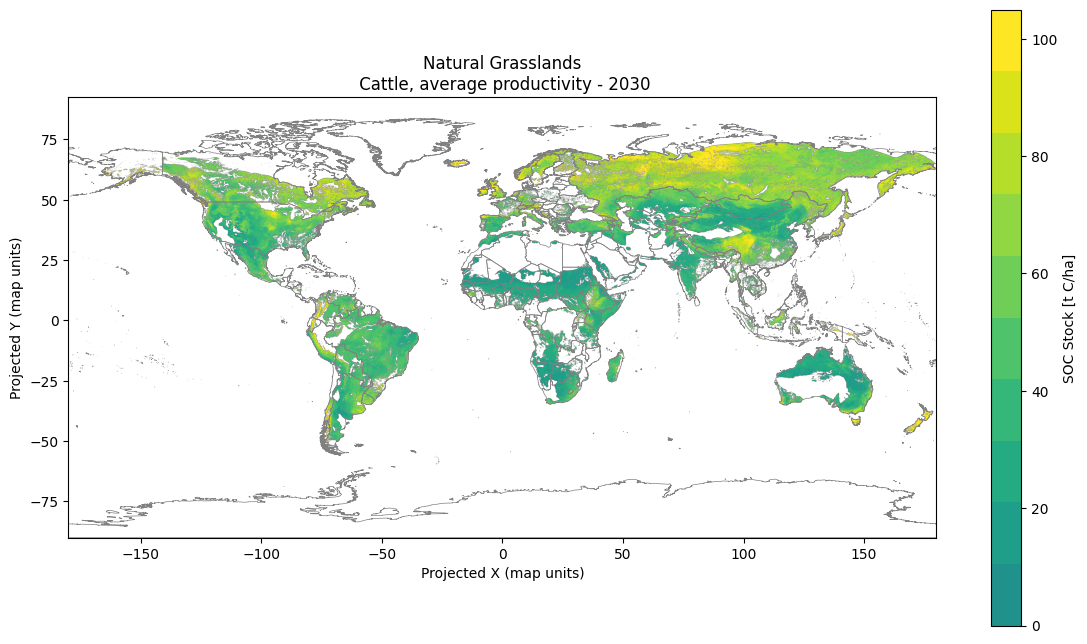

In [6]:
mp.plot_raster_on_world_extremes_cutoff("../LEAFs/SOC/rasters/natural_grassland_cattle_avg_2030y_SOC.tif", title="Natural Grasslands\n Cattle, average productivity - 2030", band=34, quantiles=10, label_title="SOC Stock [t C/ha]")

Raster has 1,209,057 unique values. Min: 15.66. Max: 104.98
Using quantiles
All positives route (quantiles)


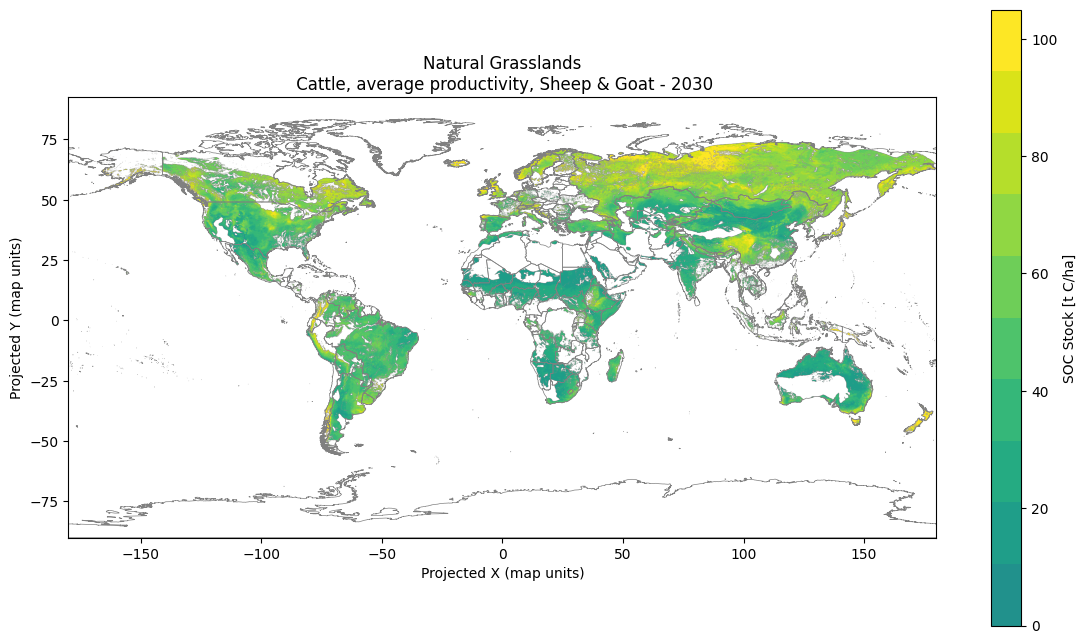

In [7]:
mp.plot_raster_on_world_extremes_cutoff("../LEAFs/SOC/rasters/natural_grassland_cattle_avg_sheep_goat_2030y_SOC.tif", title="Natural Grasslands\n Cattle, average productivity, Sheep & Goat - 2030", band=34, quantiles=10, label_title="SOC Stock [t C/ha]")